In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.inter_rater import fleiss_kappa

In [8]:
df_arj = pd.read_csv('CV-annotations/CV-annotations-Arjun.csv')
df_ven = pd.read_csv('CV-annotations/CV-annotations-Venkat.csv')
df_3 = pd.read_csv('CV-annotations/CV-annotations-3rd-member.csv')

In [9]:
df_ven.head(3)

,annotation_id,annotator,created_at,id,image,label,lead_time,updated_at
0,1,1,2025-01-24T09:15:23.361143Z,1,/data/upload/1/3aa355b2-img_620.jpg,truck,27.269,2025-01-24T09:15:23.364545Z
1,2,1,2025-01-24T09:15:54.197917Z,2,/data/upload/1/d6d95b23-img_621.jpg,not_truck,30.301,2025-01-24T09:15:54.197917Z
2,3,1,2025-01-24T09:16:10.318757Z,3,/data/upload/1/b6099dff-img_622.jpg,not_truck,15.594,2025-01-24T09:16:10.318757Z


In [10]:
df_arj.head(3)

,annotation_id,annotator,created_at,id,image,label,lead_time,updated_at
0,1,1,2025-01-24T09:15:33.648723Z,1,/data/upload/2/794ec0fe-img_620.jpg,truck,54.373,2025-01-24T09:15:33.648723Z
1,2,1,2025-01-24T09:15:55.397866Z,2,/data/upload/2/1cf0d3a7-img_621.jpg,not_truck,21.478,2025-01-24T09:15:55.397866Z
2,3,1,2025-01-24T09:15:59.780258Z,3,/data/upload/2/8557ddd8-img_622.jpg,not_truck,4.118,2025-01-24T09:15:59.780258Z


In [11]:
df_3.head(3)

,annotation_id,annotator,created_at,id,image,label,lead_time,updated_at
0,21,1,2025-01-24T09:40:11.869547Z,21,/data/upload/3/3726f338-img_620.jpg,truck,51.061,2025-01-24T09:40:11.869547Z
1,22,1,2025-01-24T09:40:21.699275Z,22,/data/upload/3/efb8adbb-img_621.jpg,not_truck,9.371,2025-01-24T09:40:21.699275Z
2,23,1,2025-01-24T09:40:29.850276Z,23,/data/upload/3/8f76d6b2-img_622.jpg,not_truck,7.804,2025-01-24T09:40:29.850276Z


In [12]:
df_combined = pd.DataFrame({
    'arjun': df_arj['label'],
    'venkat': df_ven['label'],
    'third': df_3['label']
})

df_combined.replace({'truck': 0, 'not_truck': 1}, inplace=True)

C:\Users\Venkat\AppData\Local\Temp\ipykernel_19196\2139744263.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined.replace({'truck': 0, 'not_truck': 1}, inplace=True)


In [13]:
df_combined.head(7)

,arjun,venkat,third
0,0,0,0
1,1,1,1
2,1,1,1
3,1,1,1
4,0,0,0
5,1,0,1
6,0,0,0


In [14]:
categories = ['truck', 'not_truck']
contingency_table = pd.DataFrame(0, index=df_combined.index, columns=categories)

In [15]:
contingency_table.head(7)

,truck,not_truck
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0


In [16]:
for col in df_combined.columns:
    for idx, label in enumerate(df_combined[col]):
        contingency_table.loc[idx, categories[label]] += 1

In [17]:
contingency_table.head(7)
# keeping count of the frequencies of truck and not_truck by the 3 annotators

,truck,not_truck
0,3,0
1,0,3
2,0,3
3,0,3
4,3,0
5,1,2
6,3,0


In [19]:
matrix = contingency_table.values
kappa = fleiss_kappa(matrix, method='fleiss')

print(f"Fleiss' Kappa: {kappa:.4f}")

Fleiss' Kappa: 0.7222


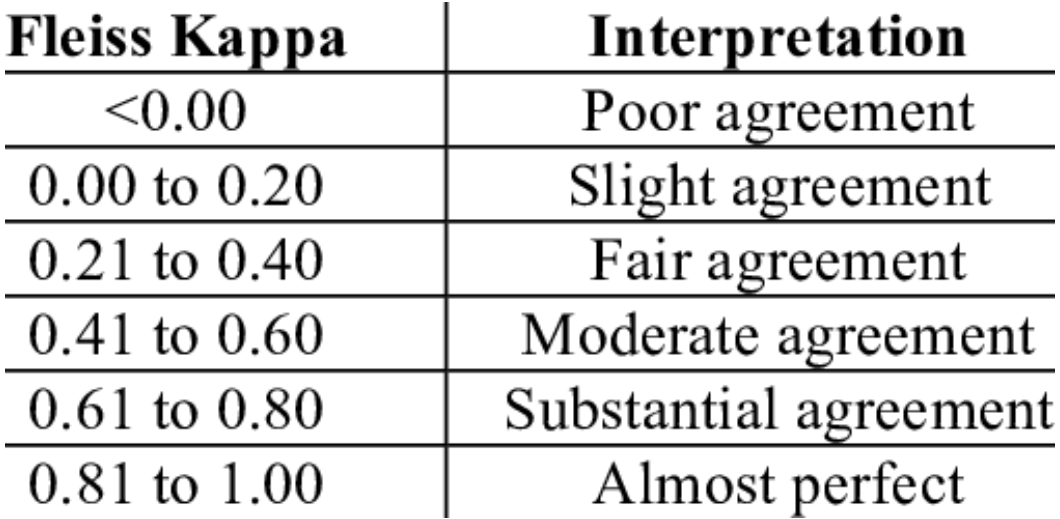

We have obtained a Fleiss' Kappa value of 0.7222, indicating substantial agreement among the three annotators—Venkat, Arjun, and Srivats (a member from another team).

One of the reasons we couldn't achieve a score above 0.80 is the presence of some ambiguous images, where it was not entirely clear whether a truck was present or not.